In [12]:
import torch
from torchvision import transforms, datasets
import numpy as np
import matplotlib.pyplot as plt


def get_loader(name_dataset):

    # Computed with compute_mean_std.py
    mean_std = {
        'amazon':{
            'mean': [0.79235494, 0.7862071 , 0.78418255],
            'std':  [0.31496558, 0.3174693 , 0.3193569 ]
        },
        'dslr':{
            'mean': [0.47086468, 0.44865608, 0.40637794],
            'std':  [0.20395322, 0.19204104, 0.1996422 ]
        },
        'webcam':{
            'mean': [0.6119875 , 0.6187739 , 0.61730677],
            'std':  [0.25063968, 0.25554898, 0.25773206]
        }
    }


    data_transform = transforms.Compose([
            transforms.Scale(224),
            transforms.ToTensor(),
            transforms.Normalize(mean= mean_std[name_dataset]['mean'],
                                 std= mean_std[name_dataset]['std'])
        ])

    dataset = datasets.ImageFolder(root='./data/%s/images'%name_dataset,
                                               transform=data_transform)
    dataset_loader = torch.utils.data.DataLoader(dataset,
                                                 batch_size=4, shuffle=True,
                                                 num_workers=4)
    return dataset_loader


def imshow(image_tensor, mean, std, title=None):
    """
    Imshow for normalized Tensors.
    Useful to visualize data from data loader
    """

    image = image_tensor.numpy().transpose((1, 2, 0))
    image = std * image + mean
    image = np.clip(image, 0, 1)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


/Users/denis/anaconda3/envs/vqa/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.


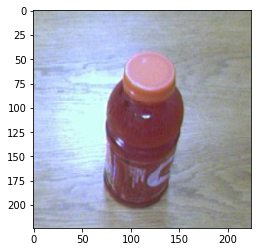

In [16]:
source = 'webcam'
source_loader = get_loader(source)
source_dataset = source_loader.dataset
image_tensor = source_dataset.__getitem__(99)[0]

imshow(image_tensor,mean_std[source]['mean'],mean_std[source]['std'])